In [1]:
import numpy as np
import os

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import classification_report


2023-11-26 23:26:19.556066: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-26 23:26:19.713658: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-26 23:26:20.454506: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-26 23:26:20.454649: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-26 23:26:20.615623: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
#Model tests

model = load_model('pet_hdpe_can_glass_model.h5')

In [4]:

def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = load_img(image_path, target_size=target_size)

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Expand dimensions to match the model's input format
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image
    img_array = preprocess_input(img_array)

    return img_array

In [13]:
test_dir = 'plastic_bottles/testing'  # Path to the folder containing the PET images

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(224, 224),  # Adjust to match your model's input size
#     batch_size=1,
#     class_mode=None,  # Since we don't have labeled classes in the directory
#     shuffle=False)


# Store predictions and image paths
predictions = []
image_paths = []

for filename in os.listdir(test_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add other file types if needed
        image_path = os.path.join(test_dir, filename)
        processed_image = load_and_preprocess_image(image_path)
        prediction = model.predict(processed_image)
        predictions.append(prediction)
        image_paths.append(image_path)

1/1 [==============================] - 0s 32ms/step


In [15]:
predicted_classes = [np.argmax(prediction) for prediction in predictions]

In [18]:
# Initialize an empty dictionary
class_to_image_paths = {}

In [19]:
for predicted_class, image_path in zip(predicted_classes, image_paths):
    # If the class is not in the dictionary, add it with a new list
    if predicted_class not in class_to_image_paths:
        class_to_image_paths[predicted_class] = []

    # Append the image path to the corresponding class' list
    class_to_image_paths[predicted_class].append(image_path)

In [20]:
class_to_image_paths

{3: ['plastic_bottles/testing/1662500573.5248945.jpg',
  'plastic_bottles/testing/1662500492.9678504.jpg',
  'plastic_bottles/testing/1662500519.5422728.jpg',
  'plastic_bottles/testing/1662500498.5266643.jpg',
  'plastic_bottles/testing/0218101409_jpg.rf.375b14c4d2a267cf0c593a069434f88c.jpg',
  'plastic_bottles/testing/700022_jpg.rf.ff26e5ad1d96c021d0306d66ec4f079e.jpg',
  'plastic_bottles/testing/1662500619.608125.jpg',
  'plastic_bottles/testing/700276_jpg.rf.906b9ab10121383d89af058ed4fd8f36.jpg',
  'plastic_bottles/testing/1662500563.7283146.jpg',
  'plastic_bottles/testing/700024_jpg.rf.6d06e56e229ca453ca1954d455cebb2f.jpg',
  'plastic_bottles/testing/700059_jpg.rf.45fc8b7cc5c2ab3a0462999ffe385973.jpg',
  'plastic_bottles/testing/1662500561.1235878.jpg',
  'plastic_bottles/testing/1662500517.3924885.jpg',
  'plastic_bottles/testing/1662500624.334842.jpg',
  'plastic_bottles/testing/1662500501.4713295.jpg',
  'plastic_bottles/testing/0218102320_jpg.rf.bb368773273f5eae640c4a4955a36a

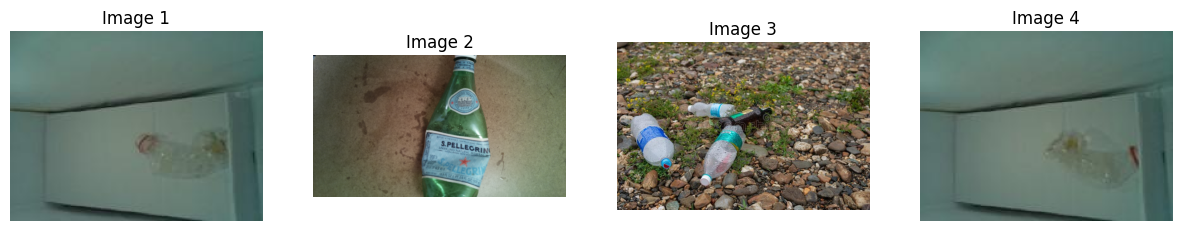

In [23]:
# Class index to plot
class_index = 1

# Get the list of image paths for the class
image_paths = class_to_image_paths.get(class_index, [])

# Set up the matplotlib figure and axes
plt.figure(figsize=(15, 10))  # Adjust the size as per your requirement

# Loop through the image paths and plot each image
for i, image_path in enumerate(image_paths):
    # Load the image
    img = Image.open(image_path)

    # Add a subplot for each image
    plt.subplot(1, len(image_paths), i+1)  # Adjust layout parameters as needed
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')

# Show the plot
plt.show()


In [26]:
test_dir = 'aluminum/testing'  # Path to the folder containing the PET images

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(224, 224),  # Adjust to match your model's input size
#     batch_size=1,
#     class_mode=None,  # Since we don't have labeled classes in the directory
#     shuffle=False)


# Store predictions and image paths
predictions = []
image_paths = []

for filename in os.listdir(test_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add other file types if needed
        image_path = os.path.join(test_dir, filename)
        processed_image = load_and_preprocess_image(image_path)
        prediction = model.predict(processed_image)
        predictions.append(prediction)
        image_paths.append(image_path)

1/1 [==============================] - 0s 36ms/step


In [28]:
predicted_classes = [np.argmax(prediction) for prediction in predictions]

for predicted_class, image_path in zip(predicted_classes, image_paths):
    # If the class is not in the dictionary, add it with a new list
    if predicted_class not in class_to_image_paths:
        class_to_image_paths[predicted_class] = []

    # Append the image path to the corresponding class' list
    class_to_image_paths[predicted_class].append(image_path)

In [36]:
test_dir = 'plastic_jugs/testing'  # Path to the folder containing the PET images

# test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(224, 224),  # Adjust to match your model's input size
#     batch_size=1,
#     class_mode=None,  # Since we don't have labeled classes in the directory
#     shuffle=False)


# Store predictions and image paths
predictions = []
image_paths = []

for filename in os.listdir(test_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Add other file types if needed
        image_path = os.path.join(test_dir, filename)
        processed_image = load_and_preprocess_image(image_path)
        prediction = model.predict(processed_image)
        predictions.append(prediction)
        image_paths.append(image_path)

1/1 [==============================] - 0s 32ms/step


In [38]:
predicted_classes = [np.argmax(prediction) for prediction in predictions]

In [39]:
class_to_image_paths = {}

In [40]:
for predicted_class, image_path in zip(predicted_classes, image_paths):
    # If the class is not in the dictionary, add it with a new list
    if predicted_class not in class_to_image_paths:
        class_to_image_paths[predicted_class] = []

    # Append the image path to the corresponding class' list
    class_to_image_paths[predicted_class].append(image_path)

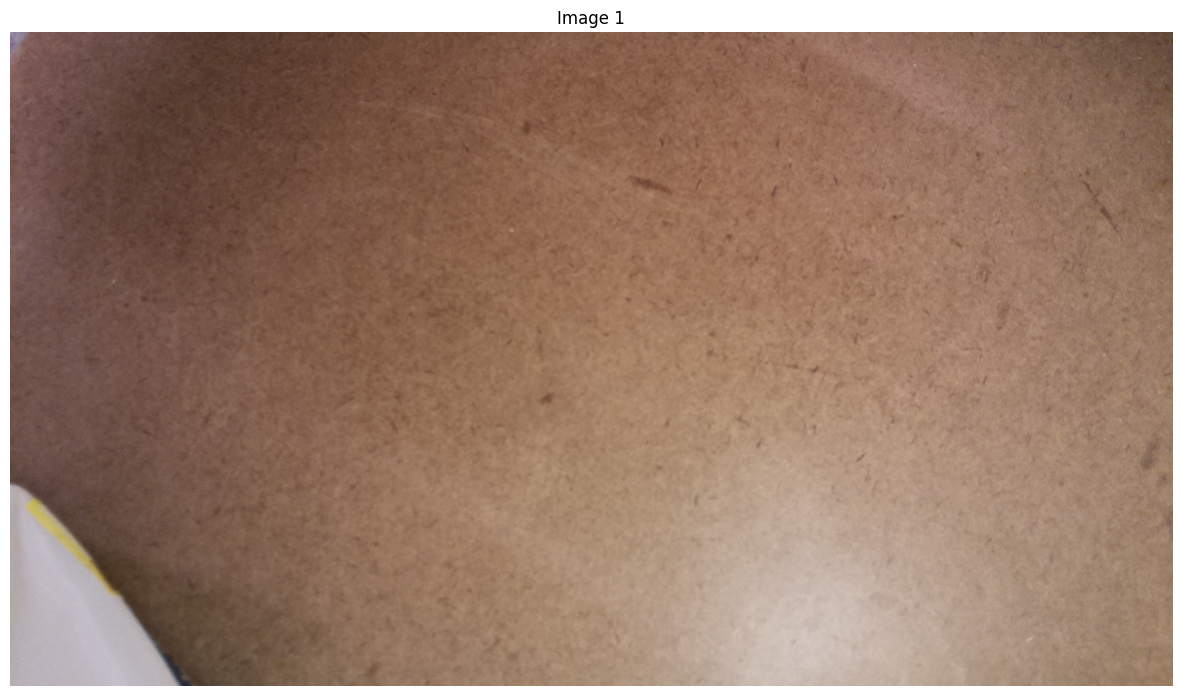

In [48]:
# Class index to plot
class_index = 0

# Get the list of image paths for the class
image_paths = class_to_image_paths.get(class_index, [])

# Set up the matplotlib figure and axes
plt.figure(figsize=(15, 10))  # Adjust the size as per your requirement

# Loop through the image paths and plot each image
for i, image_path in enumerate(image_paths):
    # Load the image
    img = Image.open(image_path)

    # Add a subplot for each image
    plt.subplot(1, len(image_paths), i+1)  # Adjust layout parameters as needed
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')

# Show the plot
plt.show()
